In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import confusion_matrix,log_loss
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
original_train = pd.read_json('train_rf.json')
original_test = pd.read_json('test_rf.json')

In [5]:
# original_train = pd.read_json('final_train.json')
# original_test = pd.read_json('final_test.json')

# Cross-validation

In [6]:
def cv_score_manual(model,X,y):    
    kf = KFold(n_splits = 10)
    i = 1
    scores = []
    for train_index, valid_index in kf.split(X):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        model.fit(X_train,y_train)
        scores.append(model.score(X_valid,y_valid))
    return np.array(scores).mean()

In [7]:
def cv_score(clr,X,y):
    score = cross_val_score(clr,X,y,cv=5)
    return score.mean()

# Preprocessing

In [7]:
train = original_train.drop(columns = {'rec_id','created','building_id','description','display_address','manager_id','features','photos','street_address','clean_feat'})
train['price_per_bedroom'] = train['price']/(train['bedrooms']+1)
train['price_per_bathroom'] = train['price']/(train['bathrooms']+1)
X = train.drop(columns = {'interest_level'})
y = train['interest_level']
X = X.reset_index(drop = True)
y = y.reset_index(drop = True)

In [8]:
X

,bathrooms,bedrooms,latitude,listing_id,longitude,price,desc_apartment,diff_rooms,desc_appliances,desc_bedroom,...,ft_roofdeck,ft_swimmingpool,ft_terrace,ft_war,manager_id_num,building_id_num,photo_num,distance_subway,price_per_bedroom,price_per_bathroom
0,1.0,1,40.7108,7170325,-73.9539,2400,0.272717,0.0,0.000000,0.296784,...,0.000000,0.000000,0.000000,0.190534,2762,6071,12,304.673389,1200.000000,1200.0
1,1.0,2,40.7513,7092344,-73.9722,3800,0.505808,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.245240,2560,8401,6,323.876878,1266.666667,1900.0
2,1.0,2,40.7575,7158677,-73.9625,3495,0.556350,1.0,0.248164,0.392847,...,0.209892,0.217943,0.215179,0.148338,3452,9327,6,552.143820,1165.000000,1747.5
3,1.5,3,40.7145,7211212,-73.9425,3000,0.350236,1.5,0.407659,0.381143,...,0.000000,0.000000,0.350195,0.241414,1565,3788,5,131.089810,750.000000,1200.0
4,1.0,0,40.7439,7225292,-73.9743,2795,0.000000,-1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.382024,790,8701,4,698.529082,2795.000000,1397.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49160,1.0,3,40.8433,6824800,-73.9396,2800,0.259303,2.0,0.301817,0.477782,...,0.246549,0.256006,0.252759,0.174245,2850,6638,5,287.012856,700.000000,1400.0
49161,1.0,2,40.8198,6813268,-73.9578,2395,0.330112,1.0,0.000000,0.359243,...,0.000000,0.000000,0.000000,0.567510,2451,3877,5,425.094259,798.333333,1197.5
49162,1.0,1,40.5765,6927093,-73.9554,1850,0.288677,0.0,0.336008,0.314152,...,0.276723,0.287338,0.283694,0.195570,2762,4728,3,519.874244,925.000000,925.0
49163,1.0,2,40.7448,6892816,-74.0017,4195,0.342800,1.0,0.000000,0.373051,...,0.000000,0.000000,0.000000,0.221933,3372,2723,5,331.873686,1398.333333,2097.5


In [10]:
test = original_test.drop(columns = {'rec_id','created','building_id','description','display_address','manager_id','features','photos','street_address','clean_feat'})
test['price_per_bedroom'] = test['price']/(test['bedrooms']+1)
test['price_per_bathroom'] = test['price']/(test['bathrooms']+1)
test['diff_rooms'] = test['bedrooms']-test['bathrooms']
X_test = test.reset_index(drop = True)

In [10]:
# X = original_train
# y = X['interest_level']
# X = X.drop(columns = {'interest_level'})

In [11]:
def calc_log_loss(model,X,y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_valid)
    print(log_loss(y_valid, y_pred))
    return model

In [11]:
X_test

,bathrooms,bedrooms,latitude,listing_id,longitude,price,desc_apartment,desc_appliances,desc_bedroom,desc_building,...,ft_swimmingpool,ft_terrace,ft_war,manager_id_num,building_id_num,photo_num,distance_subway,price_per_bedroom,price_per_bathroom,diff_rooms
0,1.0,1,40.7185,7142618,-73.9865,2950,0.294434,0.000000,0.542513,0.000000,...,0.000000,0.000000,0.166176,3071,5524,8,81.603311,1475.000000,1475.000000,0.0
1,1.0,2,40.7278,7210040,-74.0000,2850,0.000000,0.476836,0.000000,0.000000,...,0.396378,0.391351,0.000000,3587,0,3,360.366494,950.000000,1425.000000,1.0
2,1.0,0,40.7260,7174566,-74.0026,2295,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3952,0,1,99.244353,2295.000000,1147.500000,-1.0
3,1.0,2,40.7321,7191391,-74.0028,2900,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1136,11318,4,147.270775,966.666667,1450.000000,1.0
4,1.0,1,40.7054,7171695,-74.0095,3254,0.347235,0.404166,0.377877,0.604718,...,0.337731,0.333448,0.229869,2871,5864,6,161.565385,1627.000000,1627.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74654,1.0,1,40.7925,6928108,-73.9454,1700,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1207,8607,10,274.294950,850.000000,850.000000,0.0
74655,1.0,2,40.7456,6906674,-73.9797,4195,0.386238,0.000000,0.420322,0.397274,...,0.000000,0.000000,0.231367,743,6588,4,207.183160,1398.333333,2097.500000,1.0
74656,1.0,0,40.7416,6897967,-73.9829,2400,0.199737,0.232485,0.217363,0.347847,...,0.232411,0.229463,0.000000,3952,0,0,199.807524,2400.000000,1200.000000,-1.0
74657,2.0,2,40.7485,6842183,-73.9800,6895,0.515009,0.000000,0.000000,0.529725,...,0.000000,0.000000,0.000000,1879,9114,8,320.834714,2298.333333,2298.333333,0.0


# Output Result

In [18]:
def to_result_format(X,y_):
    res = pd.DataFrame(y_,columns=['high', 'low', 'medium'])
    temp = res['low']
    res = res.drop(columns = {'low'})
    res.insert(2,'low',temp)
    res.insert
    res.insert(0,'listing_id',X['listing_id'])
    res.to_csv('submission.csv', index = None)
    return res

# RF First Time

In [13]:
model = RandomForestClassifier(n_estimators=100, max_depth = 20,oob_score=True)
model = calc_log_loss(model,X,y)

0.686806446978833


In [158]:
y_test = model.predict_proba(X_test)
to_result_format(X_test, y_test)

,listing_id,high,medium,low
0,7142618,0.099306,0.257708,0.642986
1,7210040,0.104234,0.222812,0.672954
2,7174566,0.102414,0.183907,0.713679
3,7191391,0.108928,0.221155,0.669917
4,7171695,0.099521,0.221743,0.678736
...,...,...,...,...
74654,6928108,0.231291,0.305022,0.463687
74655,6906674,0.087219,0.228982,0.683799
74656,6897967,0.101350,0.204238,0.694412
74657,6842183,0.088276,0.214989,0.696735


# Improvements

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif
from sklearn.feature_selection import SelectFromModel

In [16]:
def extra_tree(X,X_test,y,k):
    model = ExtraTreesClassifier() #设置ExtraTrees
    model.fit(X, y)
    temp = np.array(model.feature_importances_)
    temp_index = np.argpartition(temp, -k)[-k:]
    X_new = X.iloc[:,temp_index]
    X_test_new = X_test.iloc[:,temp_index]
    return X_new,X_test_new

In [17]:
def f_score(X,X_test,y,k):
    tempindex = SelectKBest(f_classif,k=k).fit(X,y).get_support(indices = True)
    X_new = X.iloc[:,tempindex]
    X_test_new = X_test.iloc[:,tempindex]
    return X_new,X_test_new

In [18]:
def MI(X,X_test,y,k):              # best
    tempindex = SelectKBest(mutual_info_classif,k=k).fit(X,y).get_support(indices = True)
    X_new = X.iloc[:,tempindex]
    X_test_new = X_test.iloc[:,tempindex]
    return X_new,X_test_new

# Feature Selection

In [19]:
X_new,X_test_new = extra_tree(X,X_test,y,20)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
model_new = RandomForestClassifier(max_depth = 14, min_impurity_decrease=0.0007, n_estimators = 500)
model_new = calc_log_loss(model_new,X_new,y)

0.6692318339644133


In [21]:
y_test = model_new.predict_proba(X_test_new)
to_result_format(X_test, y_test)

,listing_id,high,medium,low
0,7142618,0.118527,0.252550,0.628924
1,7210040,0.119391,0.225103,0.655506
2,7174566,0.121674,0.170187,0.708139
3,7191391,0.119476,0.224659,0.655865
4,7171695,0.109932,0.218150,0.671918
...,...,...,...,...
74654,6928108,0.282461,0.306555,0.410984
74655,6906674,0.101014,0.210516,0.688470
74656,6897967,0.122321,0.179490,0.698189
74657,6842183,0.101606,0.209948,0.688446


# PCA

In [119]:
def find(a):
    for i in range(a):
        x_all = pd.concat([X,X_test],sort=False)
        X_all = PCA(n_components=21).fit_transform(x_all)
        X_pca = X_all[:49165]
        X_test_pca = X_all[49165:]
        model_rf_pca = RandomForestClassifier(n_estimators=100,max_features = 18+i, max_depth = 20,oob_score=True)
        print('features:{}'.format(15+i))
        model_rf_pca = calc_log_loss(model_rf_pca,X_pca,y)
        print('-----------------------------------')

In [14]:
x_all = pd.concat([X,X_test],sort=False)
X_all = PCA(n_components=30).fit_transform(x_all)
X_pca = X_all[:49165]
X_test_pca = X_all[49165:]

In [15]:
model_rf_pca = RandomForestClassifier(n_estimators=500, max_depth = 8, oob_score=True, n_jobs = 8)

In [16]:
model_rf_pca.fit(X_pca,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=8,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [19]:
y_test_pca = model_rf_pca.predict_proba(X_test_pca)
to_result_format(X_test,y_test_pca)

,listing_id,high,medium,low
0,7142618,0.083669,0.286084,0.630247
1,7210040,0.057981,0.137295,0.804724
2,7174566,0.025336,0.074827,0.899837
3,7191391,0.113797,0.313886,0.572318
4,7171695,0.038875,0.194049,0.767076
...,...,...,...,...
74654,6928108,0.193879,0.326722,0.479398
74655,6906674,0.089601,0.319826,0.590574
74656,6897967,0.015695,0.055517,0.928787
74657,6842183,0.014785,0.099030,0.886185


In [20]:
model_rf_pca = calc_log_loss(model_rf_pca,X_pca,y)

NameError: name 'calc_log_loss' is not defined

# ExtraTree

In [27]:
model_et = ExtraTreesClassifier(n_estimators=500,max_depth=30)

In [28]:
model_et = calc_log_loss(model_et,X_pca,y)

KeyboardInterrupt: 

In [ ]:
y_test_pca = model_et.predict_proba(X_test_pca)
to_result_format(X_test,y_test_pca)

# Confusion Matrix

In [137]:
X_train, X_valid, y_train, y_valid = train_test_split(X_pca,y,test_size=0.20)

In [138]:
y_pred = model_rf_pca.predict(X_valid)

In [139]:
def cm_plot(y_valid,y_pred):
    cm = confusion_matrix(y_valid, y_pred, labels = ['high','low','medium'])
    cm = pd.DataFrame(cm,columns=['high','low','medium'],index = ['high','low','medium'])
    plt.title('Confusion Matrix',fontsize=18)
    ax = sns.heatmap(cm,annot=True,cmap='Blues',fmt='.20g',linewidths = 0)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xlabel('Predicted Label',fontsize=12)
    plt.ylabel('True Label',fontsize=12)
    plt.savefig('cm.png',dpi=800)

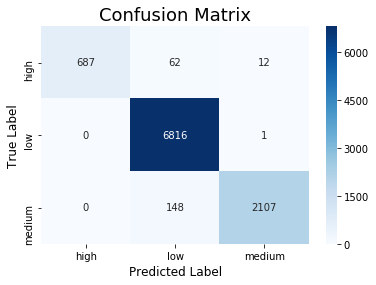

In [140]:
cm_plot(y_valid,y_pred)